In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import linear_model

In [2]:
# Model-specific imports:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-newest.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
1402,1403,7206.0,1504.7,3760.2,1681.7,486.7,6875.2,4697.6,448.8,239959.8386,...,2.543,2.452,2.632,2.238,2.502,2.422,2.647,2.589,2.49133,62
3939,3940,7395.9,986.0,3582.0,1444.2,483.9,7421.3,4174.4,505.5,205729.4086,...,2.419,2.614,2.386,2.021,2.344,2.282,2.649,2.514,2.38197,58
145,146,6909.4,1683.0,3564.7,1017.1,857.0,5847.1,4762.5,398.2,224170.5652,...,2.192,2.410,2.270,1.692,2.352,2.185,2.406,2.299,2.28319,73
2235,2236,8660.0,1160.0,4084.6,1800.0,481.6,7967.3,5743.8,548.6,230334.9529,...,2.362,2.406,2.439,1.953,2.283,2.297,2.671,2.479,2.38208,54
3971,3972,7601.3,1316.8,3450.0,1557.6,949.9,7973.7,4955.9,559.6,248611.0785,...,2.457,2.658,2.528,2.372,2.832,2.380,2.755,2.675,2.54983,65


In [4]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['Age'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [5]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

X.shape
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(4226, 14)

In [6]:
# instantiate a logistic regression model using sklearn:

reg = linear_model.BayesianRidge()

# fit the model to the training data
reg.fit(X_train, y_train)

BayesianRidge()

In [7]:
# check the model's performance on unseen, test data
predictions = reg.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.7665253319625621
mean absolute error (years): 7.654881423010187
mean square error: 90.60513842841685
root mean absolute error (years): 9.518673144320948


/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

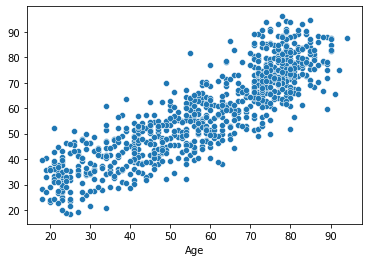

In [8]:
import seaborn as sns
sns.scatterplot(y_test, predictions)

In [9]:
# similar to linear regression, but since linear regression was good fit we expect this 
#to also be a good fit